In [1]:
import context_explore
import importlib
importlib.reload(context_explore)
import os
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plotCN(gf):
    for line in open(gf).readlines():
        if line.startswith("sequence"):
            line = line.split()
            start, end , cn = line[1], line[2], line[3]
            start = int(start.split(":")[1][:-1])
            end = int(end.split(":")[1][:-1])
            cn = float(cn)
            
            plt.hlines(cn, start, end)

In [3]:
gf = "/Users/bhargavi/Documents/Research/Amplicon/CCG_results/AA_output/c1e0c729-a347-4059-b47f-f73581454edc_wgs_gdc_realn_AA_results/c1e0c729-a347-4059-b47f-f73581454edc_wgs_gdc_realn_amplicon2_graph.txt"

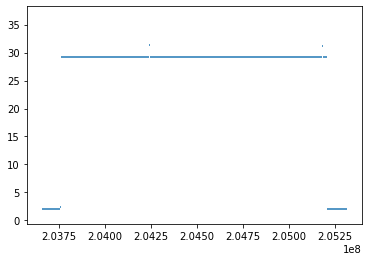

In [4]:
plotCN(gf)

In [2]:
AA_DIR = "/Users/bhargavi/Documents/Research/Amplicon/CCG_results/AA_output/"
CONVERT_FILE = False #run convert_cycles_file.py?
CONVERT_SCRIPT = "~/Documents/Research/Amplicon/convert_cycles_file.py"
PLAUSIBLE_PATHS = "/Users/bhargavi/Documents/Research/Amplicon/plausible_paths.py"

if CONVERT_FILE:
    for sample in os.listdir(AA_DIR):
        if not sample.startswith(".") and not sample.endswith(".bed"):
            for file in os.listdir(os.path.join(AA_DIR, sample)):
                if file.endswith("cycles.txt"):
                    cycles_file = os.path.join(AA_DIR, sample, file)
                    graph_file = os.path.join(AA_DIR, sample, file.split("cycles")[0] + "graph.txt")
                    pref = file.split(".txt")[0]
                    pref += "_converted"
                    print(sample)
                    %run $CONVERT_SCRIPT -o $AA_DIR/$sample/$pref -g $graph_file -c $cycles_file
                    #%run $PLAUSIBLE_PATHS -g $graph_file


In [3]:
graph_files = [os.path.join(AA_DIR, sample, file)  for sample in os.listdir(os.path.join(AA_DIR)) \
               if not sample.startswith(".") and not sample.endswith(".bed")
               for file in os.listdir(os.path.join(AA_DIR,sample))\
                if "graph.txt" in file  ]
conv_files = [file.split("graph.txt")[0] + "cycles_converted_cycles.txt" for file in graph_files ]


In [4]:
len(graph_files)

372

In [13]:
df_rows = []
for i in range(len(graph_files)):
    
    filename = graph_files[i].split("/")[-1]
    #print(filename)
    if len(open(graph_files[i]).readlines()) == 0:
        print(filename, "File is empty!")
    else:
        sample_amp = filename.split("_graph")[0] 
        sample, amp = sample_amp.split("_amplicon")
        metrics, n_trans, n_cn = context_explore.ecDNAMetrics(graph_files[i], conv_files[i])
        context = context_explore.ecDNAContext(metrics, n_trans, n_cn)

        df_rows.append([sample, int(amp),metrics[0],metrics[1], metrics[2], metrics[3],n_trans, n_cn,context])

d8a12de4-3488-44ef-9d13-2a57e783206b_wgs_gdc_realn_amplicon9_graph.txt File is empty!


In [14]:
df_cols = ['sample','amplicon_number','cycle_frac','t_n_ratio','BFB_score','n_chrs','n_trans','n_cn','Context']

cur_context = pd.DataFrame(df_rows, columns=df_cols)

cur_context.to_csv("/Users/bhargavi/Documents/Research/Amplicon/CCG_results/Amplicon_Context_26_Jan_2022.csv")

In [20]:
amplicon_class = pd.read_csv("/Users/bhargavi/Documents/Research/Amplicon/\
CCG_results/AC_output/aa_res_amplicon_classification_profiles.tsv", sep='\t')


df_rows = []
for i in range(len(graph_files)):
    AC_row = None
    filename = graph_files[i].split("/")[-1]
    #print(filename)
    sample_amp = filename.split("_graph")[0] 
    sample, amp = sample_amp.split("_amplicon")
    
    AC_row = amplicon_class.loc[(amplicon_class['sample_name'] == sample) &\
                                   (amplicon_class['amplicon_number'] == "amplicon"+amp)]
    
   
    context_row = cur_context.loc[(cur_context['sample'] == sample) & \
                                 (cur_context['amplicon_number'] == int(amp))]
    
    
    if AC_row.shape[0] > 0 and context_row.shape[0] > 0:
        
        df_rows.append([sample, int(amp), AC_row['amplicon_decomposition_class'].iloc[0],AC_row['ecDNA+'].iloc[0],\
                   AC_row['BFB+'].iloc[0],AC_row['ecDNA_amplicons'].iloc[0], context_row['cycle_frac'].iloc[0], 
                        context_row['t_n_ratio'].iloc[0],context_row['BFB_score'].iloc[0],
                       context_row['n_chrs'].iloc[0],context_row['n_trans'].iloc[0], context_row['n_cn'].iloc[0], context_row['Context'].iloc[0]])
        
    else:
        print(filename)

1fe3a5a9-7fcd-4562-8be4-63cc09cd6d02_wgs_gdc_realn_amplicon5_graph.txt
1fe3a5a9-7fcd-4562-8be4-63cc09cd6d02_wgs_gdc_realn_amplicon4_graph.txt
d8a12de4-3488-44ef-9d13-2a57e783206b_wgs_gdc_realn_amplicon9_graph.txt


In [21]:
df_cols = list(amplicon_class.columns) + ['cycle_frac','t_n_ratio','BFB_score','n_chrs','n_trans','n_cn','Context']

frame = pd.DataFrame(df_rows, columns=df_cols)

frame.to_csv("/Users/bhargavi/Documents/Research/Amplicon/CCG_results/Amplicon_Context_26_Jan_2022_exp_1.csv")

In [9]:
context_samples = list(cur_context['sample'])
AC_samples = list(amplicon_class['sample_name'])

In [10]:
amplicon_class.columns

Index(['sample_name', 'amplicon_number', 'amplicon_decomposition_class',
       'ecDNA+', 'BFB+', 'ecDNA_amplicons'],
      dtype='object')

In [11]:
for file in AC_samples:
    if file not in context_samples:
        print(file)

In [12]:
for file in context_samples:
    if file not in AC_samples:
        print(file)